# Logistic Regression Training and Testing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [11]:
df = pd.read_pickle('../pickled_dataframes/merged_df.pkl.gz', compression='gzip')
df.head()

,name_length,avg_token_length,num_tokens,period_freq,dash_freq,apostrophe_freq,space_freq,bigrams_cosine_sim,accent_count,num_alphabets,...,arab_rom_unigrams_cosine_sim,eng_unigrams_cosine_sim,french_unigrams_cosine_sim,german_unigrams_cosine_sim,ital_unigrams_cosine_sim,portug_unigrams_cosine_sim,span_unigrams_cosine_sim,parentheses_freq,quotation_freq,language
0,9,9.0,1,0,0,0,0,0.250640,0,1,...,0.558548,0.521782,0.549821,0.498951,0.585279,0.572371,0.537863,0,0,Indonesian
1,12,12.0,1,0,0,0,0,0.353292,0,1,...,0.537752,0.604509,0.571680,0.611077,0.667908,0.554799,0.545731,0,0,Indonesian
2,8,8.0,1,0,0,0,0,0.197139,0,1,...,0.623316,0.696796,0.729475,0.664509,0.718184,0.775375,0.744647,0,0,Indonesian
3,9,9.0,1,0,0,0,0,0.155386,0,1,...,0.508871,0.466730,0.458651,0.465674,0.401518,0.419256,0.436786,0,0,Indonesian
4,8,8.0,1,0,0,0,0,0.176917,0,1,...,0.328312,0.599574,0.616171,0.588177,0.651231,0.644292,0.594403,0,0,Indonesian


In [4]:
X = df.drop(columns = 'language', axis = 1)
y = df['language']

In [5]:
X.shape

(292900, 27)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 524, stratify = y)

In [8]:
model = LogisticRegression()
param_grid_lr = {'max_iter': [10000, 15000, 20000, 25000, 30000, 40000, 50000]}
grid_search = GridSearchCV(model, param_grid_lr, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_max_iter = grid_search.best_params_['max_iter']
print("Best max_iter value: ", best_max_iter)

Best max_iter value:  10000


In [7]:
#model evaluation
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)


In [8]:
y_test_pred = lr_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [9]:
print("Training Accuracy: ", train_accuracy)
train_report = classification_report(y_train, y_train_pred, output_dict = True)
print(train_report)

Training Accuracy:  0.8983612154318881
{'Arabic (Romanized)': {'precision': 0.6959459459459459, 'recall': 0.1407103825136612, 'f1-score': 0.2340909090909091, 'support': 732.0}, 'Chinese (Characters)': {'precision': 0.9469885841753051, 'recall': 0.9832425068119891, 'f1-score': 0.9647750818795535, 'support': 7340.0}, 'Chinese (Romanized)': {'precision': 0.7783409568549883, 'recall': 0.858350374914792, 'f1-score': 0.8163900414937759, 'support': 7335.0}, 'English': {'precision': 0.6791693259364721, 'recall': 0.8676618163572504, 'f1-score': 0.7619309889020461, 'support': 15944.0}, 'French': {'precision': 0.5673076923076923, 'recall': 0.07239263803680981, 'f1-score': 0.12840043525571274, 'support': 815.0}, 'German': {'precision': 0.41379310344827586, 'recall': 0.016107382550335572, 'f1-score': 0.031007751937984503, 'support': 745.0}, 'Indonesian': {'precision': 0.5460078249529053, 'recall': 0.47926736199440345, 'f1-score': 0.5104653525706156, 'support': 7862.0}, 'Italian': {'precision': 0.69

<function matplotlib.pyplot.show(close=None, block=None)>

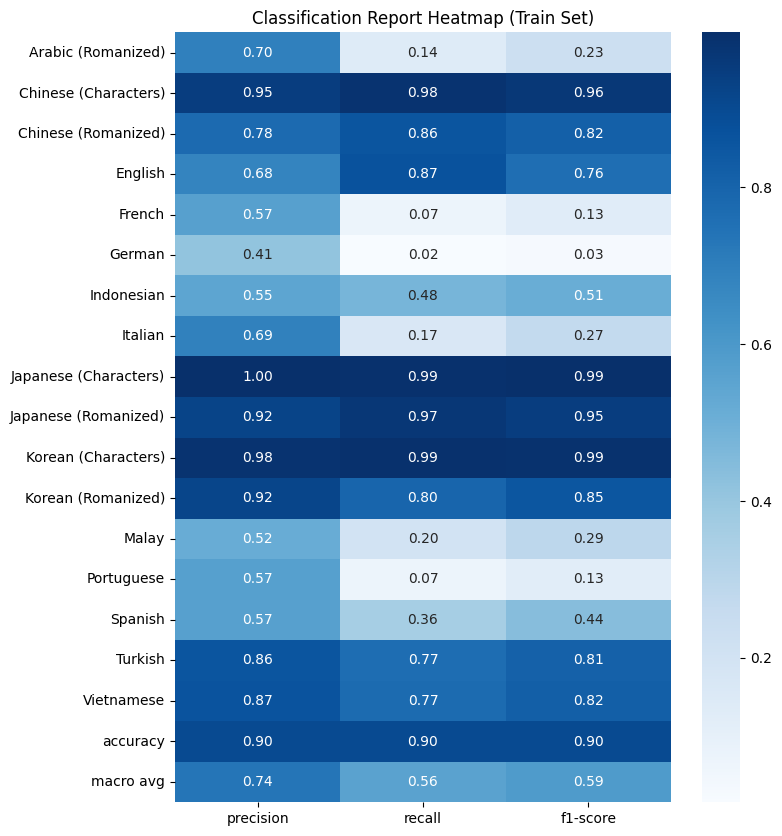

In [12]:
train_report_df = pd.DataFrame(train_report).transpose()
plt.figure(figsize = (8,10))
sns.heatmap(train_report_df.iloc[:-1, :-1], annot = True, cmap = 'Blues', fmt = '.2f')
plt.title('Classification Report Heatmap (Train Set)')
plt.show

In [13]:
test_report = classification_report(y_test, y_test_pred, output_dict=True)
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Classification Report:
                        precision    recall  f1-score   support

   Arabic (Romanized)       0.71      0.15      0.25       314
 Chinese (Characters)       0.94      0.98      0.96      3146
  Chinese (Romanized)       0.78      0.85      0.81      3143
              English       0.68      0.88      0.77      6833
               French       0.63      0.07      0.12       349
               German       0.43      0.02      0.04       319
           Indonesian       0.54      0.47      0.50      3369
              Italian       0.73      0.19      0.30       362
Japanese (Characters)       1.00      0.99      0.99     28472
 Japanese (Romanized)       0.92      0.97      0.94     27789
  Korean (Characters)       0.98      1.00      0.99      2793
   Korean (Romanized)       0.93      0.78      0.85      2940
                Malay       0.54      0.19      0.28       872
           Portuguese       0.51      0.07      0.13       320
              Spanish       0.

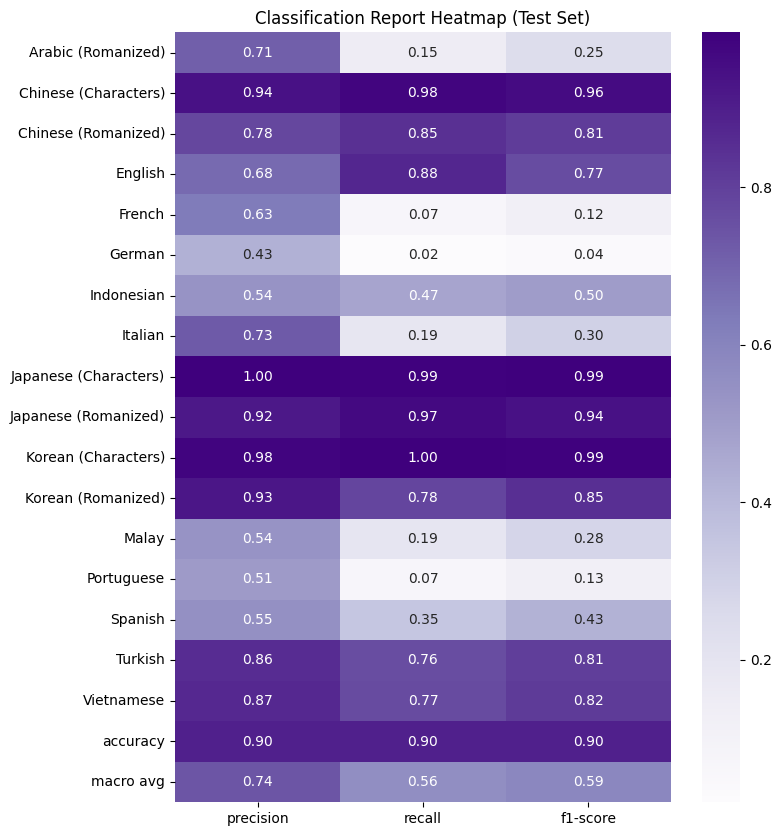

In [15]:
test_report_df = pd.DataFrame(test_report).transpose()
plt.figure(figsize = (8,10))
sns.heatmap(test_report_df.iloc[:-1, :-1], annot = True, cmap = 'Purples', fmt = '.2f')
plt.title('Classification Report Heatmap (Test Set)')
plt.show()